In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

# Regression Metrics
1. Mean Absolute Error
2. Mean Squared Error
3. Root Mean Squared Error
4. R2 Score
5. Adjested R2 Score

In [3]:
X = np.arange(100).reshape(100,1)
delta = np.random.uniform(10,400,size=(100,1))
y = 5*X + delta

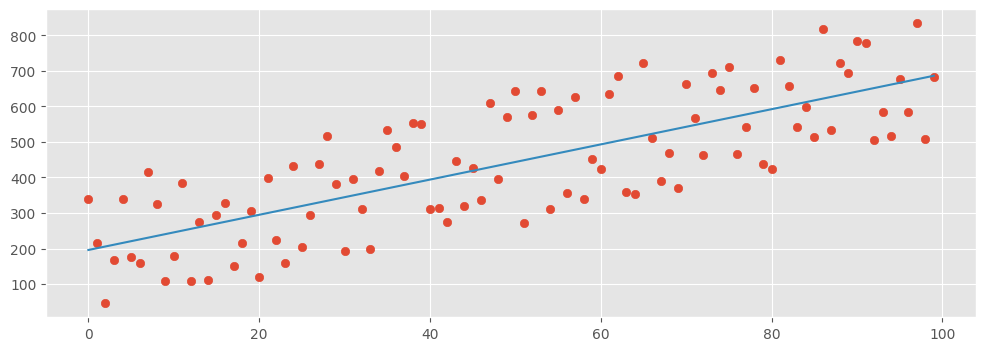

In [4]:
lr = LinearRegression()
lr.fit(X,y)
y_pred = lr.predict(X)

plt.style.use('ggplot')
plt.figure(figsize=(12,4))
plt.scatter(x=X, y=y)
plt.plot(X,y_pred,color='C1')
plt.show()

# Mean Absolute Error (MAE)
- **Advantage**
  1) Same Unit
  2) Robust Outliers
- **Disadvantage**
  1) Not difrencable at (0,0)

In [5]:
mean_absolute_error(y_pred=y_pred,y_true=y)

105.39200841821692

In [6]:
np.sum(np.abs(y-y_pred))/y.shape[0]

np.float64(105.39200841821692)

# Mean Squared Error
- **Advantage**
  1. Can be use as loss function (Difrencable as (0,0))
- **Disadvantage**
  1. Not Same Units
  2. Not Robust Outliers

In [7]:
mean_squared_error(y_true=y,y_pred=y_pred)

14070.817192718647

In [8]:
np.sum((y-y_pred)**2)/y.shape[0]

np.float64(14070.817192718647)

# Root Mean Squared Error
- **Advantage**
  1. Same Units
- **Disadvantage**
  1. Not Robust to Outliers

In [9]:
root_mean_squared_error(y_true=y,y_pred=y_pred)

118.6204754362359

In [10]:
np.sqrt(np.sum((y-y_pred)**2)/y.shape[0])

np.float64(118.6204754362359)

# R2 Score
    Also known as "Coefficent of determination" & "goodness of fit"

    Lr = Best Fit Line
    Lm = Mean Line

    R2 Score can be nagative if 'Lr' perfome worst then 'Lm'
- **Disadvantage**
  1) With an increase in irrelevant dimensions, the R-squared score also increases or stays the same, whereas it should decrease.

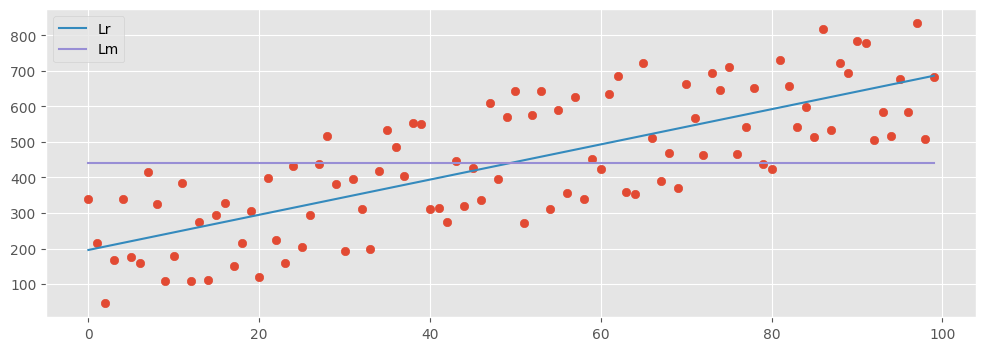

In [11]:
mean_line = np.array([y.mean() for _ in range(100)])
plt.figure(figsize=(12,4))
plt.scatter(x=X, y=y)
plt.plot(X,y_pred,color='C1', label='Lr')
plt.plot(X,mean_line,color='C2', label='Lm')
plt.legend()
plt.show()

In [12]:
r2_score(y_true=y,y_pred=y_pred)

0.5921587570833082

In [13]:
SSr = np.sum((y-y_pred)**2)
SSm = np.sum((y-y.mean())**2)
1 - (SSr/SSm)

np.float64(0.5921587570833082)

# Adjested R2 Score
    It solves the issue that comes with the R2 score.

In [14]:
r2 = r2_score(y_pred=y_pred,y_true=y)
K=0 # No. of New Dimensions Added
1 - (((1-r2)*(y.shape[0]-1))/(y.shape[0]-1-K))

0.5921587570833082